## Machine Learning- Exoplanet Exploration

#### Extensive Data Dictionary: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

Highlightable columns of note are:

* kepoi_name: A KOI is a target identified by the Kepler Project that displays at least one transit-like sequence within Kepler time-series photometry that appears to be of astrophysical origin and initially consistent with a planetary transit hypothesis

* kepler_name: [These names] are intended to clearly indicate a class of objects that have been confirmed or validated as planets—a step up from the planet candidate designation.

* koi_disposition: The disposition in the literature towards this exoplanet candidate. One of CANDIDATE, FALSE POSITIVE, NOT DISPOSITIONED or CONFIRMED.

* koi_pdisposition: The disposition Kepler data analysis has towards this exoplanet candidate. One of FALSE POSITIVE, NOT DISPOSITIONED, and CANDIDATE.

* koi_score: A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition.


In [1]:
# # Update sklearn to prevent version mismatches
# !pip install sklearn --upgrade
# # install joblib
# !pip install joblib

### Import Dependencies 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the CSV and Perform Basic Data Cleaning

In [39]:
# Read/Load CSV file
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Basic Statistic Details

In [40]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


# Select Features (columns)
* Feature Selection: Removing irrelevant feature results in better performing model that is easeir to understands & model runs faster


In [41]:
target_names = df["koi_disposition"].unique()
#target_names
print(df["koi_disposition"].unique())

['CONFIRMED' 'FALSE POSITIVE' 'CANDIDATE']


In [42]:
# Assign X (Independant data) and y (Dependant target)

# Set X equal to the entire data set, except for the first column
X = df.iloc[:, 1:]
# X.head()

# Set y equal to the first column
y = df.iloc[:,0].values.reshape(-1, 1)
# y.head()

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

# Search for top 10 features according to feature importances
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

# sorted(zip(model.feature_importances_, X), reverse=True)

array([0.14401172, 0.19466661, 0.12982615, 0.05230706, 0.01815049,
       0.01730816, 0.01742889, 0.01147778, 0.02113885, 0.02148096,
       0.0101728 , 0.01060538, 0.00784027, 0.01628463, 0.02272483,
       0.02870116, 0.01655016, 0.01116373, 0.01093295, 0.00981888,
       0.00912221, 0.00950065, 0.01414462, 0.00905618, 0.00910245,
       0.00688535, 0.02616296, 0.0104569 , 0.00925218, 0.01296136,
       0.01935648, 0.00886132, 0.00959387, 0.01345281, 0.00780641,
       0.01090274, 0.00967427, 0.01177043, 0.00999163, 0.00935374])

In [53]:
# Store the top (10) features  as a series, using the column headers as the index
top_feat = pd.Series(model.feature_importances_, index=X.columns).nlargest(10)
top_feat

koi_fpflag_ss        0.194667
koi_fpflag_nt        0.144012
koi_fpflag_co        0.129826
koi_fpflag_ec        0.052307
koi_duration_err2    0.028701
koi_model_snr        0.026163
koi_duration_err1    0.022725
koi_time0bk_err2     0.021481
koi_time0bk_err1     0.021139
koi_steff_err2       0.019356
dtype: float64

In [54]:
# Set features based on feature importances
X = df[top_feat.index]

# Use `koi_disposition` for the y values
y = df['koi_disposition']

#y = df['koi_disposition'].values.reshape(-1, 1)

# Create a Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

# Split the data into smaller buckets for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_duration_err2,koi_model_snr,koi_duration_err1,koi_time0bk_err2,koi_time0bk_err1,koi_steff_err2
6122,0,0,0,0,-0.3060,10.8,0.3060,-0.008440,0.008440,-171
6370,1,0,0,1,-0.2820,13.8,0.2820,-0.007950,0.007950,-175
2879,0,1,0,0,0.0000,254.3,0.0000,-0.006190,0.006190,-189
107,0,0,0,0,-0.0595,38.4,0.0595,-0.001820,0.001820,-85
29,0,0,0,0,-0.0075,696.5,0.0075,-0.000083,0.000083,-77


In [56]:
# X and y Train shape have 5243 rows (80% of data)
X_train.shape, y_train.shape

((5243, 10), (5243,))

In [57]:
# X and y Test shape have 1748 rows (20% of data)
X_test.shape, y_test.shape

((1748, 10), (1748,))

# Pre-processing

Scale the data using the MinMaxScaler

MinMaxScaler: 
              * A way to normalize the input features/variables
              * Features will be transformed into the range
              * Scales the range of fetures from 0 to 1


In [58]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler object
X_scaler = MinMaxScaler().fit(X_train)

# Scale training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#print(np.matrix(X_test_scaled))

# Train the Model 
* Find the Best KNN (Nearest Neighbor)



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []

# Loop through to find the best k value
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

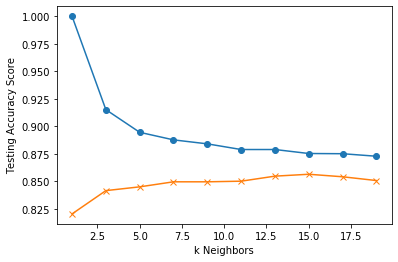

In [61]:
# Plot training and testing scores    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

# Current best k value looks like k=15

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [64]:
# Check Logistic Regression parameters that can be used for Tuning
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [79]:
from sklearn.model_selection import GridSearchCV

metrics = ['euclidean','manhattan'] 
neighbors = np.arange(1, 20)
param_grid  = dict(metric=metrics, n_neighbors=neighbors)

grid = GridSearchCV(model, param_grid, verbose=3, cv=100, scoring='accuracy', refit=True)

In [80]:
# Train the model with GridSearch

grid.fit(X_train_scaled, y_train)

Fitting 100 folds for each of 38 candidates, totalling 3800 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.833, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.907, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=1, score=0.796, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.815, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.796, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.815, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.796, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.796, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=1, score=0.942, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.769, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.769, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=2, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.755, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.792, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.792, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.774, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=2, score=0.765, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.784, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.745, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=3, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.923, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=4, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.963, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=4, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.804, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=5, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.962, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.792, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.774, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=5, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=5 .................................
[CV] ..... metric=euclidean, n_neighbors=5, score=0.784, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.889, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.833, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=6, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.904, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] ..... metric=euclidean, n_neighbors=6, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=6 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=7, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.755, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=7, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.804, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.882, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.902, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] ..... metric=euclidean, n_neighbors=7, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=7 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=8, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.904, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] ..... metric=euclidean, n_neighbors=8, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=8 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=9, score=0.833, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.815, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.889, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] .

[CV] ..... metric=euclidean, n_neighbors=9, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] ..... metric=euclidean, n_neighbors=9, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=9 .................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=10, score=0.755, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.774, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=10, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.882, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.804, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .... metric=euclidean, n_neighbors=10, score=0.784, total=   0.0s
[CV] metric=euclidean, n_neighbors=10 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=11, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.904, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .... metric=euclidean, n_neighbors=11, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=11 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=12, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.889, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.907, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.981, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.944, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=12, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.885, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .... metric=euclidean, n_neighbors=12, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=12 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=13, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=13, score=0.784, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.902, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.882, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .... metric=euclidean, n_neighbors=13, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=13 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=14, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.923, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .... metric=euclidean, n_neighbors=14, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=14 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=15, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.925, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.925, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.925, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=15, score=0.804, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.882, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.902, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=16, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.868, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.962, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=17, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.833, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.852, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.833, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.907, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.870, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=17, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.808, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .... metric=euclidean, n_neighbors=17, score=0.788, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=18, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.811, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.830, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.792, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.887, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.849, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=18, score=0.902, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.902, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.843, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.882, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.863, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .... metric=euclidean, n_neighbors=18, score=0.824, total=   0.0s
[CV] metric=euclidean, n_neighbors=18 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=19, score=0.906, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.846, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.923, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.865, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.827, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .... metric=euclidean, n_neighbors=19, score=0.923, total=   0.0s
[CV] metric=euclidean, n_neighbors=19 ................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=1, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.811, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=1, score=0.784, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.784, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.725, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] ..... metric=manhattan, n_neighbors=1, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=1 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=2, score=0.925, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.792, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.811, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] ..... metric=manhattan, n_neighbors=2, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=2 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=3, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=3, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] ..... metric=manhattan, n_neighbors=3, score=0.769, total=   0.0s
[CV] metric=manhattan, n_neighbors=3 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=4, score=0.811, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.774, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.774, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=4, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.882, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] ..... metric=manhattan, n_neighbors=4, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=4 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=5, score=0.774, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.925, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.811, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] ..... metric=manhattan, n_neighbors=5, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=5 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=6, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=6, score=0.808, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.904, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.808, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] ..... metric=manhattan, n_neighbors=6, score=0.788, total=   0.0s
[CV] metric=manhattan, n_neighbors=6 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=7, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.792, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=7, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.882, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] ..... metric=manhattan, n_neighbors=7, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=7 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=8, score=0.943, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.811, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] ..... metric=manhattan, n_neighbors=8, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=8 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=9, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.815, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.833, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.815, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] .

[CV] ..... metric=manhattan, n_neighbors=9, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.904, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.885, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] ..... metric=manhattan, n_neighbors=9, score=0.808, total=   0.0s
[CV] metric=manhattan, n_neighbors=9 .................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=10, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.792, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=10, score=0.882, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.882, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.902, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.843, total=   0.1s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=11, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.885, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.904, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=12, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.981, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=12, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.904, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .... metric=manhattan, n_neighbors=12, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=12 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=13, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.943, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=13, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.922, total=   0.0s
[CV] metric=manhattan, n_neighbors=13 ................................
[CV] .... metric=manhattan, n_neighbors=13, score=0.745, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=14, score=0.885, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .... metric=manhattan, n_neighbors=14, score=0.923, total=   0.0s
[CV] metric=manhattan, n_neighbors=14 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=15, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.925, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.792, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=15, score=0.843, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.804, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .... metric=manhattan, n_neighbors=15, score=0.863, total=   0.0s
[CV] metric=manhattan, n_neighbors=15 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=16, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.774, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.887, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .... metric=manhattan, n_neighbors=16, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=16 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=17, score=0.815, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.796, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=17, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.885, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.808, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .... metric=manhattan, n_neighbors=17, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=17 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=18, score=0.906, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.830, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.925, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.868, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.849, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=18, score=0.824, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.902, total=   0.0s
[CV] metric=manhattan, n_neighbors=18 ................................
[CV] .... metric=manhattan, n_neighbors=18, score=0.765, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.852, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.870, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.907, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.889, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=19, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.808, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.865, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.827, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.942, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .... metric=manhattan, n_neighbors=19, score=0.846, total=   0.0s
[CV] metric=manhattan, n_neighbors=19 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 3800 out of 3800 | elapsed:  1.7min finished
C:\Users\cache\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=100, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [83]:
# List the best parameters for this dataset
print(grid.best_params_)

# List the best score
print('Best Score: %.3f' % grid.best_score_)

{'metric': 'manhattan', 'n_neighbors': 17}
Best Score: 0.865


In [84]:
# Score the model
print('Model Score: %.3f' % grid.score(X_test_scaled, y_test))

Model Score: 0.856


In [85]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_scaled)
df_grid = pd.DataFrame({"Actual":y_test, "Predicted":predictions}) 
df_grid.head()

,Actual,Predicted
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE


In [86]:
# Calculate classification report
# print(np.array(y_test))

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=target_names))

                precision    recall  f1-score   support

     CONFIRMED       0.73      0.66      0.69       411
FALSE POSITIVE       0.74      0.77      0.75       484
     CANDIDATE       0.98      1.00      0.99       853

      accuracy                           0.86      1748
     macro avg       0.82      0.81      0.81      1748
  weighted avg       0.85      0.86      0.85      1748



# Save the Model

In [87]:
import joblib
filename = 'KNN.sav'
joblib.dump(KNeighborsClassifier, filename)

['KNN.sav']